In [3]:
# Install Ultralytics library
!pip install ultralytics

  Using cached ultralytics-8.3.71-py3-none-any.whl.metadata (35 kB)
  Using cached numpy-2.1.1-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scipy-1.15.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.6.0-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata 

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\shanm\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\sympy\\parsing\\ast_parser.py'
Check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\shanm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
!pip install numpy pandas matplotlib seaborn opencv-python Pillow pyyaml ultralytics IPython

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics-8.3.71-py3-none-any.whl.metadata (35 kB)
  Using cached torchvision-0.21.0-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached ultralytics-8.3.71-py3-none-any.whl (914 kB)
Using cached torchvision-0.21.0-cp311-cp311-win_amd64.whl (1.6 MB)
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\shanm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [9]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [10]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:01<00:00, 4.62MB/s]



image 1/1 C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\sample_image.jpg: 384x640 5 cars, 169.5ms
Speed: 0.0ms preprocess, 169.5ms inference, 13.7ms postprocess per image at shape (1, 3, 384, 640)


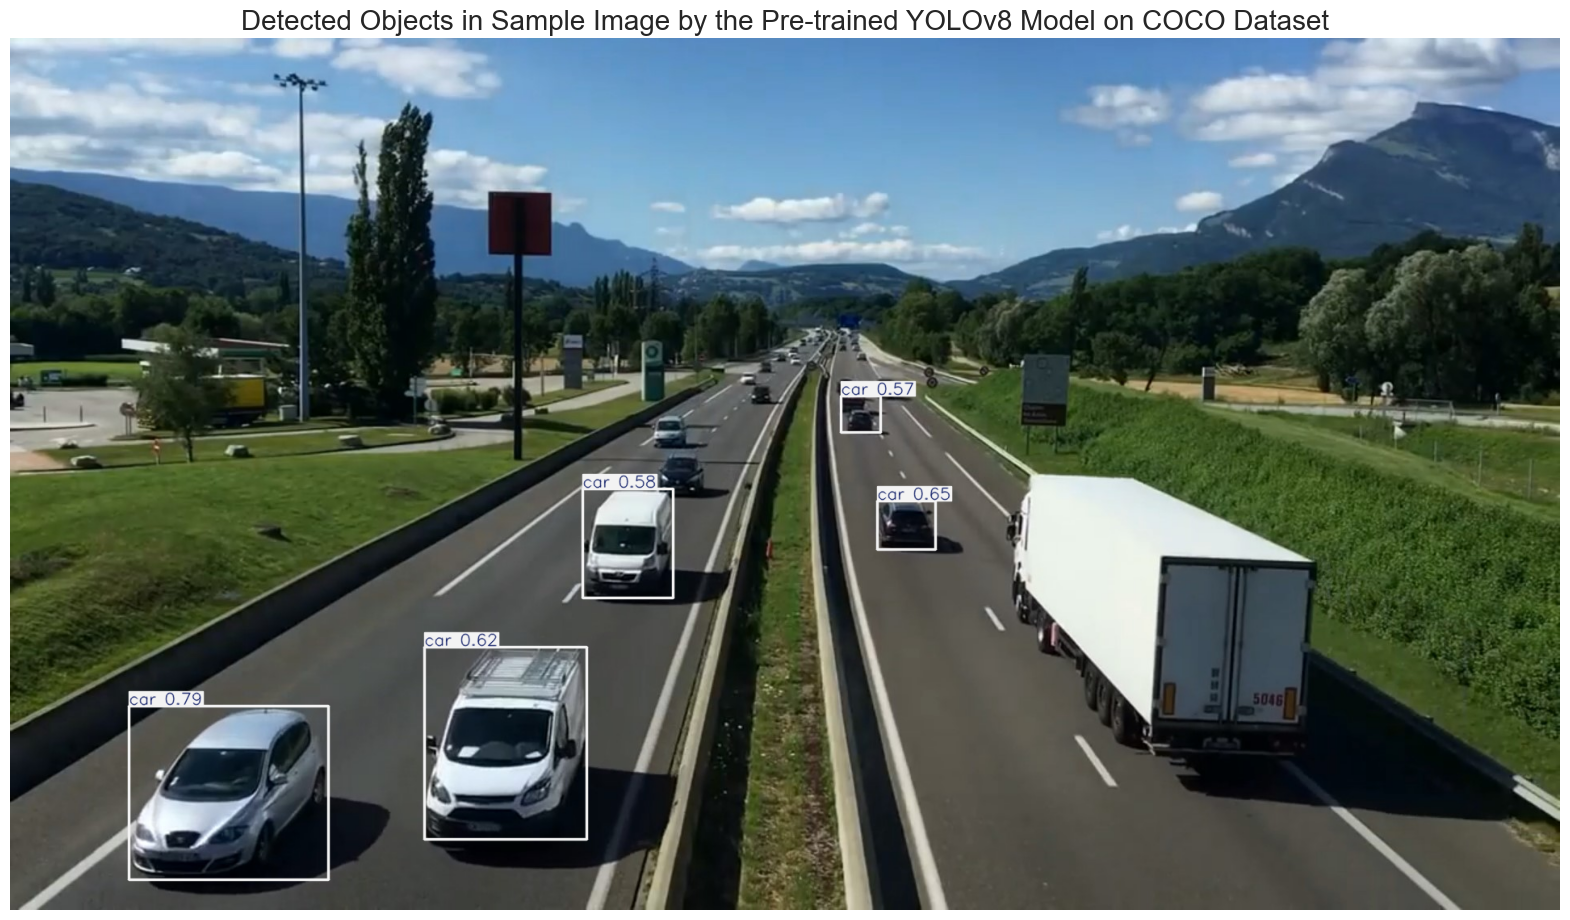

In [12]:
# Path to the image file (using raw string to handle backslashes correctly)
image_path = r'C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\sample_image.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640 (the size of images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()


In [14]:
# Define the dataset_path as the directory where the image is located
dataset_path = r'C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))


names:
- Vehicle
nc: 1
roboflow:
  license: CC BY 4.0
  project: vehicle_detection_yolov8
  url: https://universe.roboflow.com/farzad/vehicle_detection_yolov8/dataset/3
  version: 3
  workspace: farzad
train: ../train/images
val: ../valid/images



In [15]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


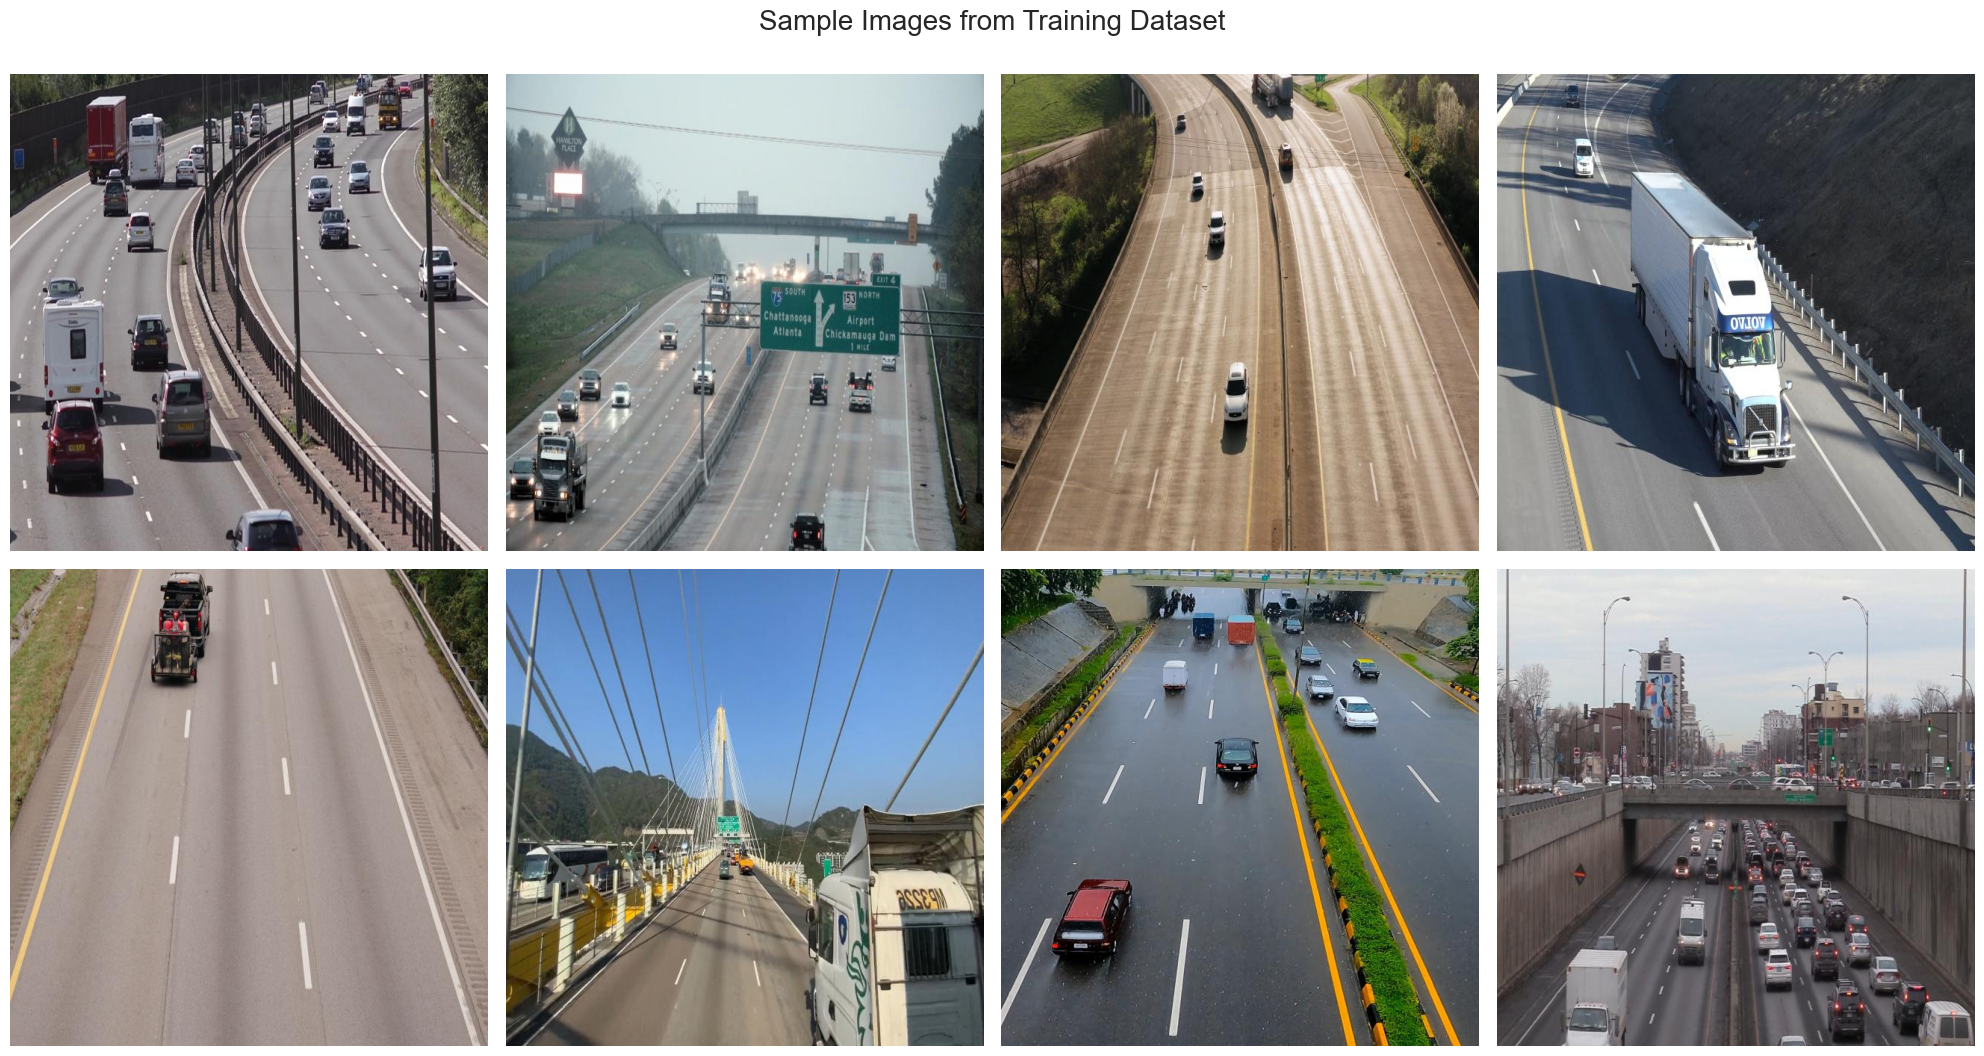

In [16]:
# List all jpg images in the directory
image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]

# Select 8 images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 8)]

# Create a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(20, 11))

# Display each of the selected images
for ax, img_file in zip(axes.ravel(), selected_images):
    img_path = os.path.join(train_images_path, img_file)
    image = Image.open(img_path)
    ax.imshow(image)
    ax.axis('off')  

plt.suptitle('Sample Images from Training Dataset', fontsize=20)
plt.tight_layout()
plt.show()

In [18]:
pip install torch==2.6.0+cu116 torchvision==0.15.0+cu116 torchaudio==0.15.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==2.6.0+cu116 (from versions: 2.0.0, 2.0.0+cpu, 2.0.0+cu117, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cu117, 2.0.1+cu118, 2.1.0, 2.1.0+cpu, 2.1.0+cu118, 2.1.0+cu121, 2.1.1, 2.1.1+cpu, 2.1.1+cu118, 2.1.1+cu121, 2.1.2, 2.1.2+cpu, 2.1.2+cu118, 2.1.2+cu121, 2.2.0, 2.2.0+cpu, 2.2.0+cu118, 2.2.0+cu121, 2.2.1, 2.2.1+cpu, 2.2.1+cu118, 2.2.1+cu121, 2.2.2, 2.2.2+cpu, 2.2.2+cu118, 2.2.2+cu121, 2.3.0, 2.3.0+cpu, 2.3.0+cu118, 2.3.0+cu121, 2.3.1, 2.3.1+cpu, 2.3.1+cu118, 2.3.1+cu121, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.6.0+cu116

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\shanm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device='cpu',            # Switch to CPU if no GPU is available
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate 
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)


Ultralytics 8.3.71  Python-3.11.9 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\data.yaml, epochs=100, time=None, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

100%|██████████| 755k/755k [00:00<00:00, 2.90MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\train\labels... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:01<00:00, 483.03it/s]

train: New cache created: C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\train\labels.cache



val: Scanning C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\valid\labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 521.67it/s]


val: New cache created: C:\Users\shanm\OneDrive\Desktop\Intelligent Traffic Management System\images\Vehicle_Detection_Image_Dataset\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.759      3.629      2.066        516        640:  35%|███▌      | 6/17 [16:40<31:25, 171.40s/it]